In [4]:
import pandas as pd
births = pd.read_csv("Data/births.csv") 
print(births.head()) 
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [5]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


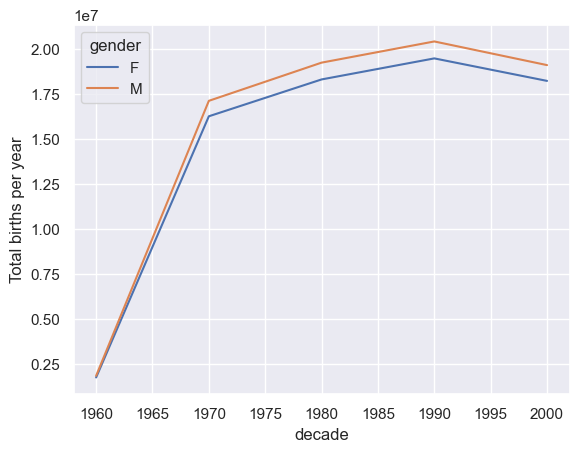

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

In [7]:
# Further Analysis
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [8]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\Admin\AppData\Local\Temp\ipykernel_21848\3504355344.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


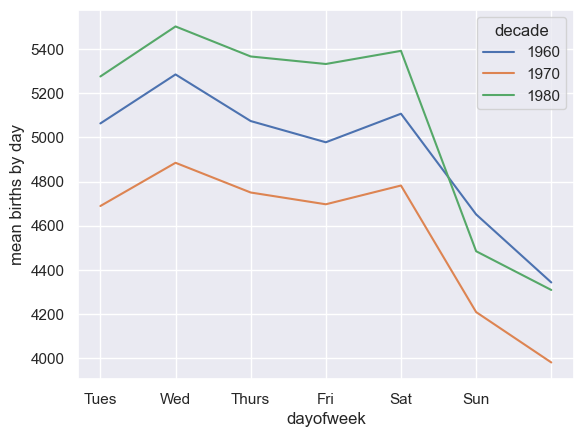

In [9]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [12]:
# Creating a pivot table
births_month = births.pivot_table('births', index=[births.index.month, births.index.day])

# Displaying the pivot table
print(births_month.head())

# Creating a new datetime index
births_month.index = [pd.to_datetime(f'2012-{month}-{day}') for (month, day) in births_month.index]

# Displaying the DataFrame with the new datetime index
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
